In [ ]:
import geopandas as gpd
!mkdir -p ../country_bounds && wget -P ../country_bounds https://storage.googleapis.com/fao-maps-catalog-data/boundaries/g2015_2014_0.zip && unzip -o ../country_bounds/g2015_2014_0.zip -d ../country_bounds
gaul = gpd.read_file("../country_bounds/g2015_2014_0.shp")  
gaul.head()

,STATUS,DISP_AREA,ADM0_CODE,ADM0_NAME,STR0_YEAR,EXP0_YEAR,SHAPE_LENG,SHAPE_AREA,geometry
0,Member State,NO,170,Mozambique,1000,3000,82.563372,67.058939,"MULTIPOLYGON (((32.99153 -25.97012, 32.99189 -..."
1,Member State,NO,160,Mauritius,1000,3000,5.204094,0.173992,"MULTIPOLYGON (((57.33786 -20.47313, 57.33677 -..."
2,Member State,NO,152,Malawi,1000,3000,26.999900,9.905567,"MULTIPOLYGON (((34.7688 -12.09417, 34.72768 -1..."
3,FR Territory,NO,161,Mayotte,1000,3000,2.404745,0.031499,"MULTIPOLYGON (((45.13795 -13.00506, 45.13774 -..."
4,Member State,NO,205,Rwanda,1000,3000,8.127003,2.063852,"POLYGON ((30.47352 -1.05741, 30.47035 -1.05937..."


In [71]:
len(gaul)

277

In [72]:
l = ["Kenya"]
countries = gaul[gaul.ADM0_NAME.isin(l)]
print(countries.ADM0_NAME.unique())

['Kenya']


<Axes: >

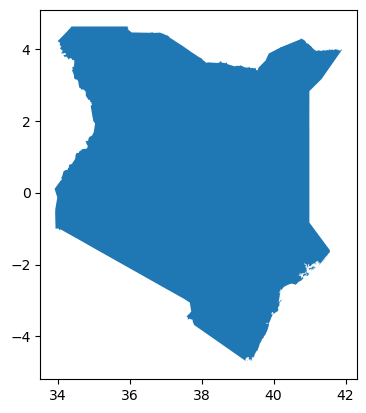

In [73]:
countries.plot()

In [74]:
# download ESA's S2 tile grid system kml 
# read in esa grid fetures
!mkdir -p ../esa_grid && wget -P ../esa_grid https://hls.gsfc.nasa.gov/wp-content/uploads/2016/03/S2A_OPER_GIP_TILPAR_MPC__20151209T095117_V20150622T000000_21000101T000000_B00.kml -O ../esa_grid/s2_tiles.kml


--2025-07-08 13:12:20--  https://hls.gsfc.nasa.gov/wp-content/uploads/2016/03/S2A_OPER_GIP_TILPAR_MPC__20151209T095117_V20150622T000000_21000101T000000_B00.kml
Resolving hls.gsfc.nasa.gov (hls.gsfc.nasa.gov)... 2001:4d0:2310:170::188, 129.164.142.188
Connecting to hls.gsfc.nasa.gov (hls.gsfc.nasa.gov)|2001:4d0:2310:170::188|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108817408 (104M) [application/vnd.google-earth.kml+xml]
Saving to: ‘../esa_grid/s2_tiles.kml’

s2_tiles.kml        100%[===================>] 103.78M  7.92MB/s    in 16s     

2025-07-08 13:12:36 (6.54 MB/s) - ‘../esa_grid/s2_tiles.kml’ saved [108817408/108817408]



In [75]:
tiles = gpd.read_file("../esa_grid/s2_tiles.kml")
tiles.head()

/home/kyle/miniconda3/envs/ee/lib/python3.13/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 's2_tiles.kml': 'Features' (default), 'Info'. Specify layer parameter to avoid this warning.
  result = read_func(


,id,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,drawOrder,icon,snippet,geometry
0,None,01CCV,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,None,,GEOMETRYCOLLECTION Z (POLYGON Z ((180 -73.0597...
1,None,01CDH,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,None,,GEOMETRYCOLLECTION Z (POLYGON Z ((180 -83.8085...
2,None,01CDJ,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,None,,GEOMETRYCOLLECTION Z (POLYGON Z ((180 -82.9134...
3,None,01CDK,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,None,,GEOMETRYCOLLECTION Z (POLYGON Z ((180 -82.0186...
4,None,01CDL,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,NaN,None,,GEOMETRYCOLLECTION Z (POLYGON Z ((180 -81.1231...


In [76]:
# intersect esa with sea taking only features in esa that intersect with sea
tiles_in_countries = gpd.sjoin(tiles, countries, how="inner", predicate="intersects")
tiles_in_countries.head()

,id,Name,description,timestamp,begin,end,altitudeMode,tessellate,extrude,visibility,...,geometry,index_right,STATUS,DISP_AREA,ADM0_CODE,ADM0_NAME,STR0_YEAR,EXP0_YEAR,SHAPE_LENG,SHAPE_AREA
33626,None,36MWD,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,...,GEOMETRYCOLLECTION Z (POLYGON Z ((32.99982 -0....,7,Member State,NO,133,Kenya,1000,3000,48.54943,47.34577
33627,None,36MWE,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,...,GEOMETRYCOLLECTION Z (POLYGON Z ((32.99982 0 0...,7,Member State,NO,133,Kenya,1000,3000,48.54943,47.34577
33635,None,36MXD,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,...,GEOMETRYCOLLECTION Z (POLYGON Z ((33.89875 -0....,7,Member State,NO,133,Kenya,1000,3000,48.54943,47.34577
33636,None,36MXE,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,...,GEOMETRYCOLLECTION Z (POLYGON Z ((33.89864 0 0...,7,Member State,NO,133,Kenya,1000,3000,48.54943,47.34577
33643,None,36MYC,TILE PROPERTIES<br><table border=0 cellpadding...,NaT,NaT,NaT,None,-1,0,-1,...,GEOMETRYCOLLECTION Z (POLYGON Z ((34.79758 -1....,7,Member State,NO,133,Kenya,1000,3000,48.54943,47.34577


In [77]:
import shapely
from shapely.geometry import shape, mapping

def flatten_and_2d(geom):
    # Convert 3D to 2D and extract polygons
    if geom.is_empty:
        return None
    if geom.geom_type == 'GeometryCollection':
        # Extract polygons or multipolygons only
        polys = [g for g in geom.geoms if g.geom_type in ['Polygon', 'MultiPolygon']]
        if polys:
            # Merge into MultiPolygon if more than one
            merged = shapely.geometry.MultiPolygon([shapely.geometry.shape(mapping(p).copy()) for p in polys])
            return shapely.force_2d(merged)
        else:
            return None
    # For other types, just force 2D
    return shapely.force_2d(geom)

tiles_in_countries['geometry'] = tiles_in_countries['geometry'].apply(flatten_and_2d)
gdf = tiles_in_countries[tiles_in_countries['geometry'].notnull()]  # Remove empty geometries

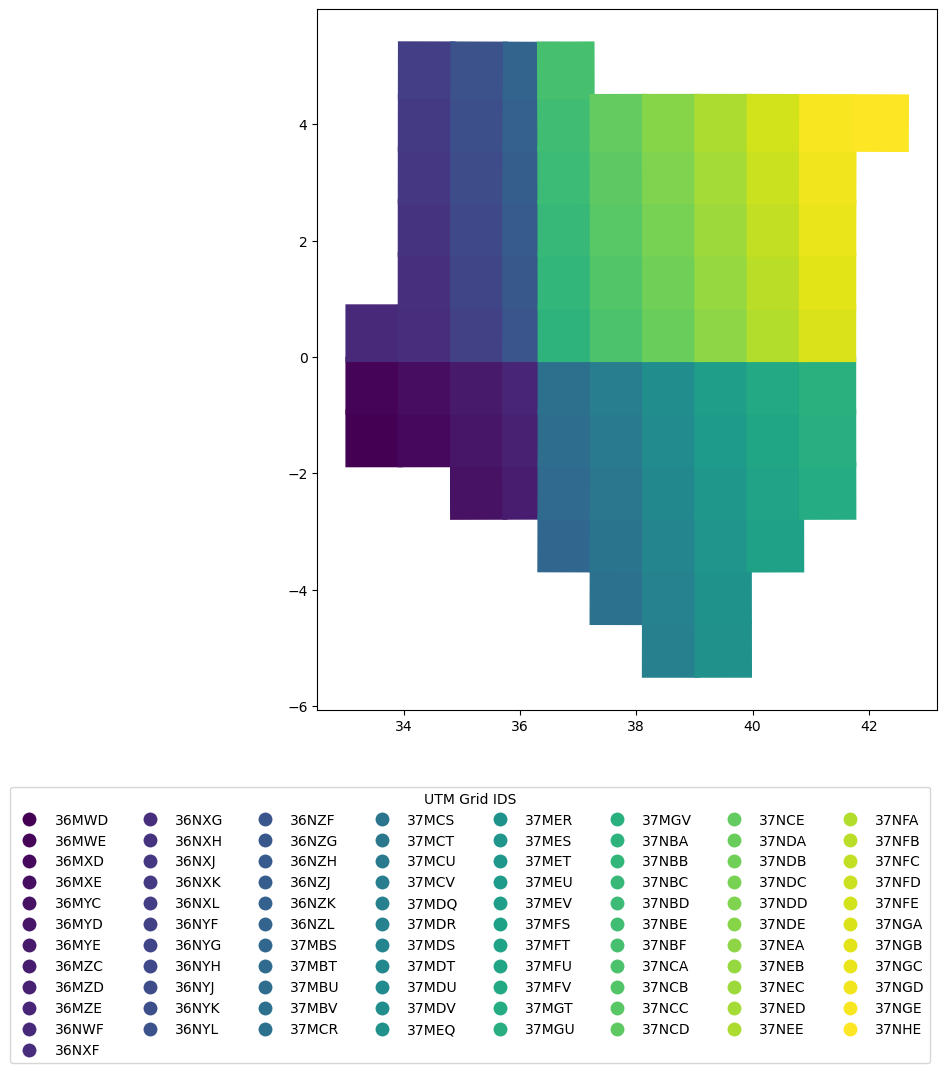

In [78]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(8,10))
gdf.plot(column='Name', 
             legend=True, 
             ax=ax, 
            #  alpha=0.5, 
             cmap='viridis',
             legend_kwds={
        'title': "UTM Grid IDS",
        'loc': 'upper right',
        'bbox_to_anchor': (1, -0.1),
        'ncol': len(gdf)/10, # The crucial parameter for multiple columns
    })
plt.show()


In [79]:
gdf.loc[:,"geometry"]

33626    MULTIPOLYGON (((32.99982 -0.90437, 33.98664 -0...
33627    MULTIPOLYGON (((32.99982 0, 33.98652 0, 33.986...
33635    MULTIPOLYGON (((33.89875 -0.90426, 34.88531 -0...
33636    MULTIPOLYGON (((33.89864 0, 34.88508 0, 34.885...
33643    MULTIPOLYGON (((34.79758 -1.80838, 35.78401 -1...
                               ...                        
34623    MULTIPOLYGON (((40.79758 1.80892, 41.78401 1.8...
34624    MULTIPOLYGON (((40.7987 2.71283, 41.78573 2.71...
34625    MULTIPOLYGON (((40.80026 3.61726, 41.78815 3.6...
34626    MULTIPOLYGON (((40.80227 4.52168, 41.79126 4.5...
34635    MULTIPOLYGON (((41.7032 4.51888, 42.69143 4.51...
Name: geometry, Length: 89, dtype: geometry

In [81]:
from pprint import pprint
adm0_name_to_names = tiles_in_countries.groupby('ADM0_NAME')['Name'].apply(list).to_dict()
pprint(adm0_name_to_names)


{'Kenya': ['36MWD',
           '36MWE',
           '36MXD',
           '36MXE',
           '36MYC',
           '36MYD',
           '36MYE',
           '36MZC',
           '36MZD',
           '36MZE',
           '36NWF',
           '36NXF',
           '36NXG',
           '36NXH',
           '36NXJ',
           '36NXK',
           '36NXL',
           '36NYF',
           '36NYG',
           '36NYH',
           '36NYJ',
           '36NYK',
           '36NYL',
           '36NZF',
           '36NZG',
           '36NZH',
           '36NZJ',
           '36NZK',
           '36NZL',
           '37MBS',
           '37MBT',
           '37MBU',
           '37MBV',
           '37MCR',
           '37MCS',
           '37MCT',
           '37MCU',
           '37MCV',
           '37MDQ',
           '37MDR',
           '37MDS',
           '37MDT',
           '37MDU',
           '37MDV',
           '37MEQ',
           '37MER',
           '37MES',
           '37MET',
           '37MEU',
           '37MEV',


In [82]:
# write this to json
import json
with open("../esa_grid/adm0_tiles_by_country.json", "w") as f:
    json.dump(adm0_name_to_names, f, indent=4)